<a href="https://colab.research.google.com/github/testgithubprecious/Ml_projects/blob/main/MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multilayer Perceptron with MNIST dataset**


This project is a classic machine learning task and one of the introductory problems in computer vision. The goal is to train a model that can recognize and classify images of handwritten digits(0-9) based on pixel data. It contains 60,000 trainning images and 10,000 testing images.



Neural network is made up of three layers namely;
- input: takes in data
- hidden: find patterns and relationships.
- and output: gives final answer.

It is inspired by the human brain and it learns patterns from data by passing information through layers of connected nodes to make predictions or decisions.

In [8]:
# import the required modules
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [14]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
# Normalize input data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [16]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [17]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8089 - loss: 0.6856 - val_accuracy: 0.9498 - val_loss: 0.1793
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9533 - loss: 0.1628 - val_accuracy: 0.9609 - val_loss: 0.1311
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9681 - loss: 0.1086 - val_accuracy: 0.9676 - val_loss: 0.1110
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9758 - loss: 0.0828 - val_accuracy: 0.9690 - val_loss: 0.1028
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9834 - loss: 0.0588 - val_accuracy: 0.9696 - val_loss: 0.1020
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.0480 - val_accuracy: 0.9734 - val_loss: 0.0855
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9899 - loss: 0.0353 - val_accuracy: 0.9717 - val_loss: 0.0922
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9912 - loss: 0.0302 - val_accuracy: 0.

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc:4f}")

# Predict on a few test samples
predictions = model.predict(x_test[:10])


 Test Accuracy: 0.976700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


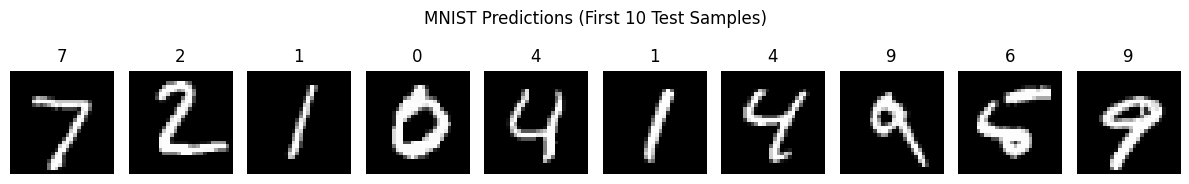

In [21]:
# Plot some test results
plt.figure(figsize=(12, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.suptitle("MNIST Predictions (First 10 Test Samples)")
plt.tight_layout()
plt.show()